#  Machine Minds: Impact of Covid-19 on Small Businesses in Illinois

Github Link: https://github.com/uic-ds-spring-2023/class-project----cs-418-spring-2023-machine-minds

## Project Introduction

The COVID-19 pandemic has had a significant impact on various aspects of our lives, including the economy. Small businesses, in particular, have been hit hard by the pandemic, with many struggling to survive in the face of lockdowns, social distancing measures, and reduced consumer spending. As a Data Science team, our focus is to analyze and visualize the impact of COVID-19 on small businesses in Illinois. By collecting and analyzing data from various sources, we aim to provide valuable insights into the challenges faced by small businesses and the measures that can be taken to help them survive and thrive in the post-pandemic world.

The impact of COVID-19 on small businesses can be seen in various aspects, such as:

Revenue: Small businesses have experienced a significant drop in revenue due to reduced consumer spending, business closures, and supply chain disruptions.

Employment: Many small businesses have been forced to lay off employees or reduce their work hours due to reduced demand for their products or services.

Financial Stability: The pandemic has created financial instability for small businesses, with many struggling to meet their expenses, pay their bills, and access loans or government support.

Changes: Our initial proposal was to analyze the impact of COVID-19 on small businesses in the United States. We made the decision to concentrate on Illinois after realizing that the dataset would be too big to evaluate in the allotted period. Our dataset now includes additional factors including the number of employees, the industry, and the location.

Data Cleaning: The U.S. Small Business Administration (SBA) and the Illinois Department of Commerce and Economic Development were two of the sources from which we gathered our data. We cleansed the data by eliminating duplicates, missing values, and outliers.

# Introduction to PPP Loan Approval Dataset

The dataset contains information about loans approved under the Paycheck Protection Program (PPP), a program established by the Small Business Administration (SBA) in response to the COVID-19 pandemic. The dataset includes various fields such as loan numbers, loan approval dates, borrower information (name, address, city, state, zip code), loan status, loan amounts, franchise name, lender information (name, address, city, state, zip code), project details (city, county, state, zip code, congressional district), number of employees, NAICS code, borrower race and ethnicity, loan proceeds usage, business type, veteran status, non-profit status, forgiveness amount and date, and other related information.

The dataset provides a comprehensive view of loans approved under the PPP program, including details about the borrowers, lenders, loan amounts, loan statuses, and other relevant information. It can be used for exploratory data analysis (EDA) to understand the distribution of loans, identify trends, assess the impact of the PPP program on different businesses, and gain insights into the loan approval process, loan usage, and loan forgiveness. The data can also be used for statistical analysis, modeling, and reporting to support decision-making, policy-making, and other analytical purposes related to the PPP program.

Importing the necessary libraries to leverage their functionalities for data analysis, visualization, and machine learning tasks. These libraries are commonly used in Python data science workflows to manipulate, visualize, and analyze data, as well as to build and evaluate machine learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Data Initialization

We will be using the SBA Paycheck Protection Program Loan Level Data. In March 2020, U.S. lawmakers agreed to a stimulus bill worth 2 trillion dollars. The package included:

- 1,200 dollars payments to adults and 500 dollars per child for households making up to 75,000 dollars
- 500 billion dollars fund loans for corporate America with every loan made public
- Unemployment benefits increased by 600 dollars for 4 months
- 25 billion dollars for airlines
- 4 billion dollars for air cargo carriers
- 3 billion dollars for airline contractors
- 367 billion dollars loans and grant program for small businesses
- 150 billion dollars for state and local governments
- 130 billion dollars for hospitals, health care systems, and providers

We will be using the data for the 367 billion dollars allotted for small businesses to see if the EDA (Exploratory Data Analysis) can help us derive any hypotheses.

### Data dictionary of SBA pulse survey dataset

The SBA pulse survey dataset provided consists of survey data from the state of Illinois, with responses to various questions grouped by instrument and answer category. Here is a brief overview of the data:

- 'state': The state where the survey was conducted (Illinois in this case).
- 'instrument_id': An identifier for the survey instrument.
- 'question': The survey question that was asked.
- 'answer_id': An identifier for the answer category.
- 'answer_text': The text of the answer category.
- 'percentage': The percentage of respondents who chose the given answer category.
- 'se': The standard error associated with the percentage.

In [2]:
data = "public_150k_plus_230331.csv"
df = pd.read_csv(data)
len(df.index)
df_pandemic = pd.read_csv('National_Sate_Illinois_data.csv')
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,1060027105,4/9/20,507,PPP,"MVP WORKFORCE, LLC",1751 Lake Cook Road Suite 600,DEERFIELD,IL,60015-5215,7/17/21,...,Limited Liability Company(LLC),119179,"Wintrust Bank, National Association",CHICAGO,IL,Unanswered,Unanswered,NaN,7083611.11,6/22/21
1,1255837210,4/15/20,507,PPP,"PLS GROUP, INC.","One South Wacker Drive, 36th Floor",CHICAGO,IL,60606-4603,10/19/21,...,Corporation,59358,"BOKF, National Association",TULSA,OK,Unanswered,Unanswered,NaN,10126944.44,7/22/21
2,1314447103,4/10/20,507,PPP,RELIABLE STAFFING SERVICES INC,870 Oak ST. 0.0,Lake in the Hills,IL,60156-6180,5/19/22,...,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,10196272.22,4/4/22
3,2083627203,4/15/20,507,PPP,"LAUNCH TECHNICAL WORKFORCE SOLUTIONS, LLC",700 Commerce Drive Suite 140,Oak Brook,IL,60523,10/20/21,...,Limited Liability Company(LLC),90226,MidFirst Bank,OKLAHOMA CITY,OK,Unanswered,Unanswered,NaN,8181368.00,9/2/21
4,2142698210,7/31/20,507,PPP,"JOHNSON SERVICE GROUP, INC.","One E. Oak Hill Drive, Suite 200 0.0",Westmont,IL,60559-5540,10/20/21,...,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,10112972.22,9/23/21


In [3]:
df_pandemic.head()

,ST,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE
0,IL,2,"Overall, how has this business been affected b...",1,Large negative effect,32.00%,1.95%
1,IL,2,"Overall, how has this business been affected b...",2,Moderate negative effect,44.00%,2.15%
2,IL,2,"Overall, how has this business been affected b...",3,Little or no effect,19.20%,1.39%
3,IL,2,"Overall, how has this business been affected b...",4,Moderate positive effect,4.30%,0.94%
4,IL,3,"In the last month, what were the total operati...",1,$0 - $500,7.20%,1.06%


In [ ]:
df.info()

In [5]:
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,4.076400e+04,40764.000000,40764.000000,40764.0,4.076400e+04,4.076400e+04,40762.000000,40764.000000,40764.000000,40498.000000,1.667000e+04,4.070300e+04,2.933000e+03,6.853000e+03,1099.000000,2.775000e+03,1.631000e+03,40764.000000,3.968700e+04
mean,5.306846e+09,507.065695,36.279585,100.0,5.693380e+05,5.678565e+05,11.898312,87141.902046,52.221396,509228.411280,2.139353e+04,5.398429e+05,5.842565e+04,6.990846e+04,3965.538944,5.019836e+04,1.477519e+04,87206.014645,5.672952e+05
std,2.603114e+09,6.387864,17.247725,0.0,8.005425e+05,7.949690e+05,1420.000910,114548.096062,68.261252,176201.472257,9.661596e+04,7.519997e+05,2.080459e+05,1.243434e+05,30125.431624,1.069390e+05,5.523382e+04,115587.471887,7.933537e+05
min,1.000328e+09,156.000000,0.000000,100.0,3.000000e+00,1.500000e+05,0.000000,2408.000000,1.000000,111110.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2408.000000,7.808000e+01
25%,2.949777e+09,507.000000,24.000000,100.0,2.044120e+05,2.047000e+05,0.000000,21562.000000,17.000000,334515.000000,1.000000e+00,1.959060e+05,0.000000e+00,1.796400e+04,0.000000,8.000000e+03,0.000000e+00,21562.000000,2.047095e+05
50%,5.343908e+09,507.000000,24.000000,100.0,3.079350e+05,3.078512e+05,0.000000,48270.000000,30.000000,541110.000000,1.000000e+00,2.954000e+05,2.000000e+04,3.563000e+04,0.000000,2.000000e+04,0.000000e+00,48270.000000,3.088168e+05
75%,7.482580e+09,507.000000,60.000000,100.0,5.872362e+05,5.869000e+05,0.000000,116998.000000,55.000000,621999.000000,1.458450e+04,5.587418e+05,5.000000e+04,7.172500e+04,0.000000,4.754100e+04,1.000000e+04,116998.000000,5.904604e+05
max,9.998867e+09,1013.000000,120.000000,100.0,1.000000e+07,1.000000e+07,208743.000000,538160.000000,500.000000,999990.000000,5.420578e+06,1.000000e+07,7.500000e+06,2.483800e+06,643017.000000,2.500000e+06,1.378810e+06,532784.000000,1.019627e+07


## Data Cleaning

The PPP loan dataset underwent a comprehensive data cleaning process to ensure the accuracy and reliability of the analysis. The following data cleaning steps were performed:

The dataset was first loaded into a pandas DataFrame. Duplicate rows were identified and removed to ensure data integrity. Unnecessary columns, which were deemed irrelevant for the analysis, were dropped from the DataFrame. The date columns were converted to the datetime data type for consistency and ease of analysis. Finally, the index of the DataFrame was reset to ensure sequential and consistent indexing. Any other necessary data cleaning or transformation steps were performed as needed. 

The data cleaning process was performed meticulously to ensure that the PPP loan dataset is free from errors, inconsistencies, and redundancies, and that the cleaned data is ready for further analysis and interpretation.


In [6]:
# remove duplicates
df = df.drop_duplicates()
df_pandemic=df_pandemic.drop_duplicates()

In [7]:
# Rename columns for clarity
df_pandemic.columns = ['state', 'instrument_id', 'question', 'answer_id', 'answer_text', 'percentage', 'se']
df_pandemic.head()

,state,instrument_id,question,answer_id,answer_text,percentage,se
0,IL,2,"Overall, how has this business been affected b...",1,Large negative effect,32.00%,1.95%
1,IL,2,"Overall, how has this business been affected b...",2,Moderate negative effect,44.00%,2.15%
2,IL,2,"Overall, how has this business been affected b...",3,Little or no effect,19.20%,1.39%
3,IL,2,"Overall, how has this business been affected b...",4,Moderate positive effect,4.30%,0.94%
4,IL,3,"In the last month, what were the total operati...",1,$0 - $500,7.20%,1.06%


In [8]:
# remove any irrelevant columns
columns_to_drop = ['LoanNumber', 'SBAOfficeCode', 'ProcessingMethod', 'LoanStatusDate',
                   'Term', 'ServicingLenderLocationID',
                   'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
                   'ServicingLenderZip', 'HubzoneIndicator',
                   'LMIIndicator', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED',
                   'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
                   'DEBT_INTEREST_PROCEED']
df = df.drop(columns=columns_to_drop)

In [9]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df['ForgivenessDate'] = pd.to_datetime(df['ForgivenessDate'])

In [10]:
print(df.info())
len(df.index)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40764 entries, 0 to 40763
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DateApproved                 40764 non-null  datetime64[ns]
 1   BorrowerName                 40764 non-null  object        
 2   BorrowerAddress              40764 non-null  object        
 3   BorrowerCity                 40764 non-null  object        
 4   BorrowerState                40764 non-null  object        
 5   BorrowerZip                  40764 non-null  object        
 6   LoanStatus                   40764 non-null  object        
 7   SBAGuarantyPercentage        40764 non-null  int64         
 8   InitialApprovalAmount        40764 non-null  float64       
 9   CurrentApprovalAmount        40764 non-null  float64       
 10  UndisbursedAmount            40762 non-null  float64       
 11  FranchiseName                1463 non-nul

40764

## Data Filter Condition: Illinois State

In this analysis, we have filtered the dataset to include only the PPP loan data for the state of Illinois. This filtering step was performed to focus specifically on the loans that were issued in Illinois, and to narrow down the analysis to this particular region. By filtering the data to Illinois state, we aim to gain insights and make conclusions that are relevant to the specific context of PPP loans in Illinois, taking into consideration the unique economic, demographic, and business landscape of the state.


In [11]:
df_illinois = df[df['BorrowerState'] == 'IL']

In [12]:
df_illinois.head()

,DateApproved,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,2020-04-09,"MVP WORKFORCE, LLC",1751 Lake Cook Road Suite 600,DEERFIELD,IL,60015-5215,Paid in Full,100,10000000.0,10000000.0,...,Limited Liability Company(LLC),119179,"Wintrust Bank, National Association",CHICAGO,IL,Unanswered,Unanswered,NaN,7083611.11,2021-06-22
1,2020-04-15,"PLS GROUP, INC.","One South Wacker Drive, 36th Floor",CHICAGO,IL,60606-4603,Paid in Full,100,10000000.0,10000000.0,...,Corporation,59358,"BOKF, National Association",TULSA,OK,Unanswered,Unanswered,NaN,10126944.44,2021-07-22
2,2020-04-10,RELIABLE STAFFING SERVICES INC,870 Oak ST. 0.0,Lake in the Hills,IL,60156-6180,Paid in Full,100,10000000.0,10000000.0,...,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,10196272.22,2022-04-04
3,2020-04-15,"LAUNCH TECHNICAL WORKFORCE SOLUTIONS, LLC",700 Commerce Drive Suite 140,Oak Brook,IL,60523,Paid in Full,100,10000000.0,10000000.0,...,Limited Liability Company(LLC),90226,MidFirst Bank,OKLAHOMA CITY,OK,Unanswered,Unanswered,NaN,8181368.00,2021-09-02
4,2020-07-31,"JOHNSON SERVICE GROUP, INC.","One E. Oak Hill Drive, Suite 200 0.0",Westmont,IL,60559-5540,Paid in Full,100,10000000.0,10000000.0,...,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,10112972.22,2021-09-23


In [13]:
len(df_illinois.index)

40764

In [13]:
df = df.reset_index(drop=True)
df.head()

,DateApproved,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,2020-04-09,"MVP WORKFORCE, LLC",1751 Lake Cook Road Suite 600,DEERFIELD,IL,60015-5215,Paid in Full,100,10000000.0,10000000.0,...,Limited Liability Company(LLC),119179,"Wintrust Bank, National Association",CHICAGO,IL,Unanswered,Unanswered,NaN,7083611.11,2021-06-22
1,2020-04-15,"PLS GROUP, INC.","One South Wacker Drive, 36th Floor",CHICAGO,IL,60606-4603,Paid in Full,100,10000000.0,10000000.0,...,Corporation,59358,"BOKF, National Association",TULSA,OK,Unanswered,Unanswered,NaN,10126944.44,2021-07-22
2,2020-04-10,RELIABLE STAFFING SERVICES INC,870 Oak ST. 0.0,Lake in the Hills,IL,60156-6180,Paid in Full,100,10000000.0,10000000.0,...,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,10196272.22,2022-04-04
3,2020-04-15,"LAUNCH TECHNICAL WORKFORCE SOLUTIONS, LLC",700 Commerce Drive Suite 140,Oak Brook,IL,60523,Paid in Full,100,10000000.0,10000000.0,...,Limited Liability Company(LLC),90226,MidFirst Bank,OKLAHOMA CITY,OK,Unanswered,Unanswered,NaN,8181368.00,2021-09-02
4,2020-07-31,"JOHNSON SERVICE GROUP, INC.","One E. Oak Hill Drive, Suite 200 0.0",Westmont,IL,60559-5540,Paid in Full,100,10000000.0,10000000.0,...,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,10112972.22,2021-09-23


# Exploratory Data Analysis

### Distribution of Loan Amounts

The below plot is a histogram that represents the distribution of loan amounts in a dataset
This histogram plot provides insights into the distribution of loan amounts, allowing for analysis of the frequency of loan amounts at different intervals. It can help in identifying any trends, patterns, or outliers in the loan amount distribution, which can be useful for making data-driven decisions and understanding the characteristics of the loan data.


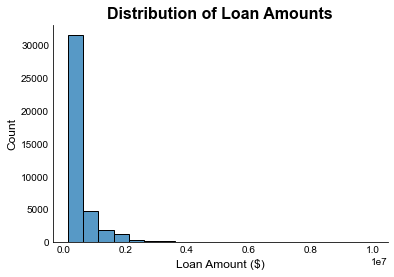

In [14]:
# Create histogram plot
sns.histplot(data=df, x='CurrentApprovalAmount', bins=20)

# Set plot title, x-axis label, and y-axis label
plt.title('Distribution of Loan Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize plot aesthetics
sns.set_style("whitegrid") # Set the background style to whitegrid
sns.despine() # Remove spines
plt.tick_params(axis='both', which='both', length=0) # Remove ticks
plt.grid(visible=False) # Hide grid lines

# Show plot
plt.show()

### Distribution of Loan Status 

The below plot titled "Distribution of Loan Status" is a countplot that provides a visual representation of the frequency or count of different loan status categories in the dataset. It is useful for gaining insights into the loan portfolio, evaluating loan performance, monitoring changes over time, and communicating findings to stakeholders. The plot allows for quick identification of trends, imbalances, and risks related to loan status, making it a valuable tool for data analysis and decision-making in the context of loan data.

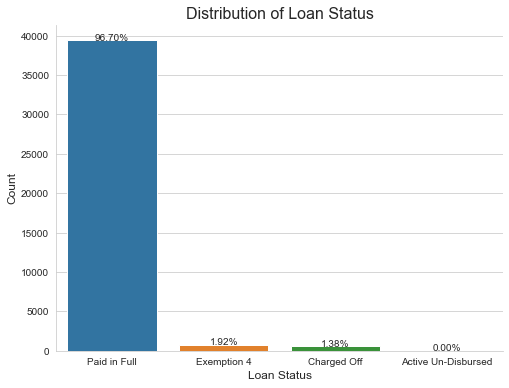

In [16]:
# Set plot style
sns.set_style("whitegrid")

# Create countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='LoanStatus')
ax.set_title('Distribution of Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Customize plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10)

plt.show()


### Relationship between Loan Amount and Forgiveness Amount

The scatter plot below is a useful visualization that helps to understand the relationship between loan amount and forgiveness amount in a dataset of loans. By examining the plot, we can gain insights into how loan amounts and forgiveness amounts are related, whether there is a linear or non-linear pattern, and identify any outliers or unusual data points. This information can be valuable for decision-making and planning purposes, such as assessing the impact of loan amount on forgiveness amounts, identifying potential trends or patterns in loan forgiveness data, and identifying loans that deviate significantly from the norm. The scatter plot serves as a visual aid to quickly grasp the overall distribution and relationship between the two variables, providing a useful tool for data analysis and decision-making.

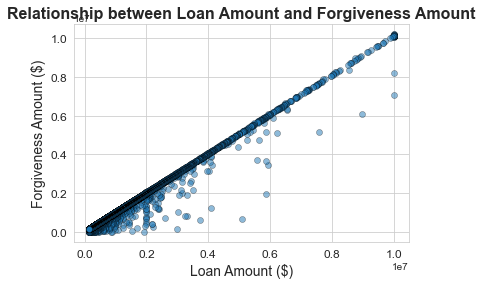

In [17]:
# Create scatter plot
sns.scatterplot(data=df, x='CurrentApprovalAmount', y='ForgivenessAmount', alpha=0.5, edgecolor='black')

# Set title and axis labels
plt.title('Relationship between Loan Amount and Forgiveness Amount', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Forgiveness Amount ($)', fontsize=14)

# Customize plot aesthetics
sns.set_style('whitegrid')  # Set seaborn style
plt.rcParams['figure.figsize'] = (10, 6)  # Set figure size
plt.xticks(fontsize=12)  # Set x-axis tick label font size
plt.yticks(fontsize=12)  # Set y-axis tick label font size

# Show the plot
plt.show()

### Distribution of Jobs Reported by Business Age

The box plot below shows the distribution of jobs reported by different business age categories. Each box represents the distribution of jobs reported for a specific business age category, with the box representing the interquartile range (IQR), the line inside the box representing the median, and the whiskers representing the range of data within 1.5 times the IQR. Outliers, if any, are shown as individual points beyond the whiskers.

This plot is useful for understanding the relationship between business age and the number of jobs reported. It provides insights into the distribution of jobs reported across different business age categories, helping to identify any variations or trends. For example, it can help identify if there are significant differences in job reporting patterns among different business age groups. The plot can also help identify potential outliers, which may represent businesses with unusually high or low job reporting numbers compared to the overall distribution. Overall, this plot provides a visual summary of the distribution of jobs reported by business age, allowing for quick and easy comparisons and insights into the data.

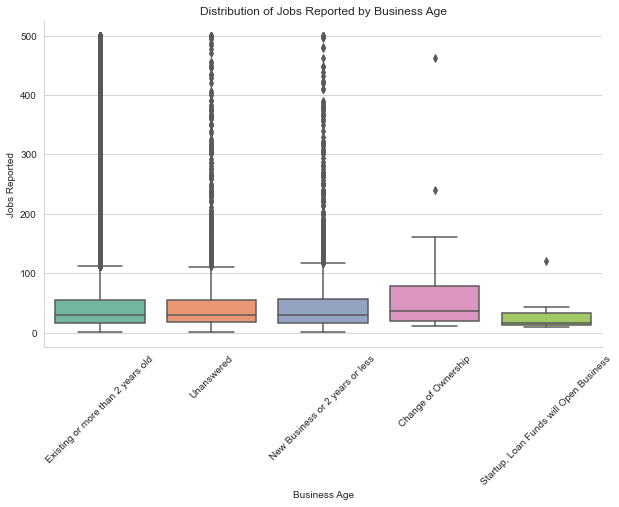

In [18]:
sns.boxplot(data=df, x='BusinessAgeDescription', y='JobsReported', palette='Set2')
plt.title('Distribution of Jobs Reported by Business Age')
plt.xlabel('Business Age')
plt.ylabel('Jobs Reported')
plt.xticks(rotation=45)
sns.despine()
plt.show()

### Distribution of Loan Amounts by Ethnicity and Gender

The violin plot below shows the distribution of loan amounts across different ethnicities, with further differentiation by gender. Each violin represents the loan amount distribution for a specific ethnic group, with the width of the violin indicating the density of the data at different values. The height of the violin represents the range of loan amounts, with the thicker portion indicating a higher concentration of data. The plot also uses different colors to distinguish between genders within each ethnic group. This plot is useful for gaining insights into the distribution of loan amounts among different ethnicities and genders, identifying any potential differences or patterns, and understanding the variability in loan amounts within each group.

### Mean Loan Amount by Loan Status with Error Bars

The below plot provides valuable insights into the relationship between loan status and the mean loan amount, with error bars indicating the variability of loan amounts. By grouping the data by loan status and calculating the mean and standard deviation of loan amounts for each group, the plot clearly shows how the mean loan amount differs across different loan statuses. The error bars provide an indication of the variability or uncertainty associated with the mean loan amounts. This plot is useful for understanding the average loan amounts associated with different loan statuses, and the variability or spread of loan amounts within each group. It can be used to identify any significant differences in loan amounts among loan statuses, which can be valuable information for decision-making and strategic planning related to loans and lending practices.

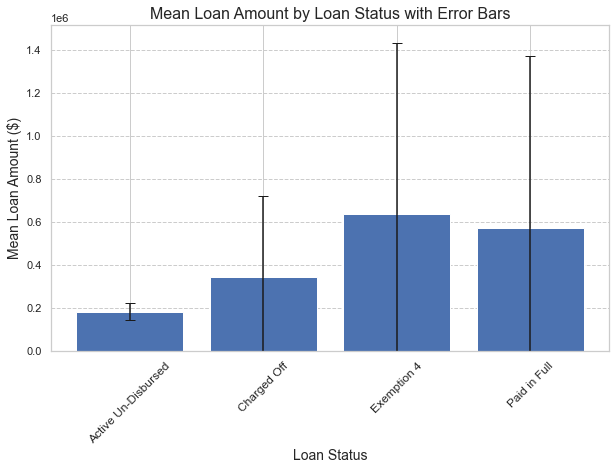

In [20]:
# Calculate mean and standard deviation of loan amount by loan status
mean_loan_amount = df.groupby('LoanStatus')['CurrentApprovalAmount'].mean()
std_loan_amount = df.groupby('LoanStatus')['CurrentApprovalAmount'].std()

# Set Seaborn style
sns.set(style='whitegrid')

# Create bar plot with error bars
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(mean_loan_amount.index, mean_loan_amount.values, yerr=std_loan_amount.values, capsize=5)

# Set labels and title
plt.title('Mean Loan Amount by Loan Status with Error Bars', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Mean Loan Amount ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Set x-axis label font size and rotation

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()


### Rural/Urban Indicator Distribution

The pie chart below depicts the distribution of rural and urban indicators in the dataset. It provides a visual representation of the proportion of each category, allowing for quick and easy understanding of the distribution. The chart is visually appealing with a pastel color palette and a legend that provides labels for the categories. This plot is useful for gaining insights into the distribution of rural and urban indicators in the dataset and understanding the relative proportions of each category.

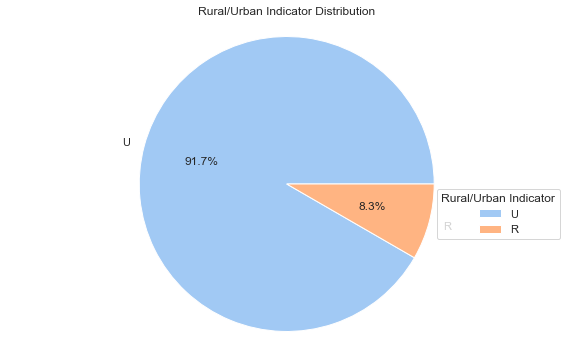

In [21]:
# Create a pie chart for rural/urban indicator
rural_urban_counts = df['RuralUrbanIndicator'].value_counts()

# Set color palette
colors = sns.color_palette('pastel')

# Create pie chart with improved visual appearance
plt.pie(rural_urban_counts, labels=rural_urban_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Rural/Urban Indicator Distribution')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Add legend
plt.legend(title='Rural/Urban Indicator', loc='best', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

### Loan Distribution Heat Map in Illinois

The below plot is a heat map of the distribution of loans approved for projects in different counties of Illinois. The darker shades of red indicate higher loan amounts approved for the respective county. The map provides a visual representation of the distribution of loans across the state and highlights the counties that have received higher loan amounts. This information can be useful for decision-making related to project funding, identifying potential areas for future investment, and monitoring the overall economic activity in different regions of Illinois. The plot also shows the county names and state border, providing a geographic context to the data.

<Figure size 720x432 with 0 Axes>

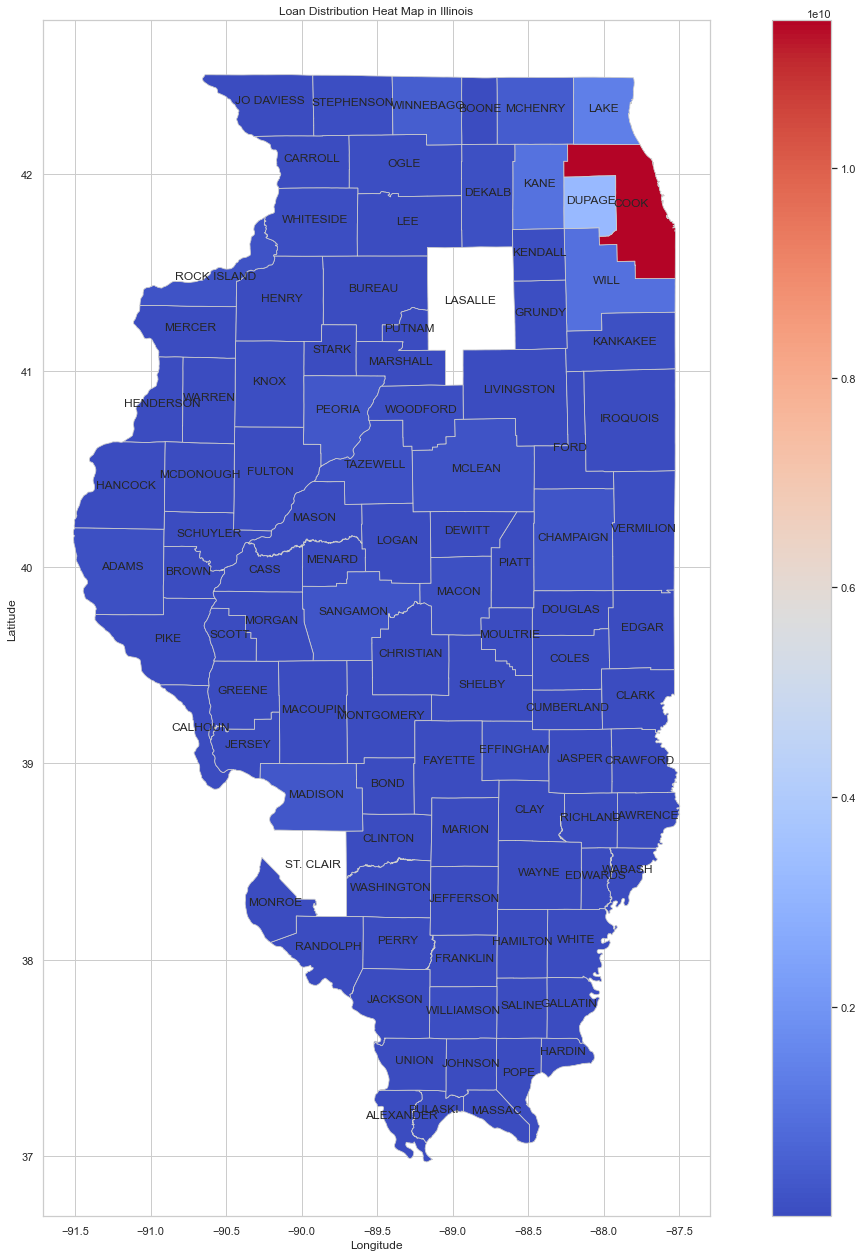

In [22]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

# Set 'SHAPE_RESTORE_SHX' config option to 'YES'
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'

# Load the Illinois shapefile
illinois_map = gpd.read_file('IL_BNDY_County/IL_BNDY_County_Py.shp')

# Group by project county and calculate the sum of loan amounts
county_loan_sum = df_illinois.groupby('ProjectCountyName')['CurrentApprovalAmount'].sum().reset_index()

# Merge the loan sum data with the Illinois shapefile
illinois_map = illinois_map.merge(county_loan_sum, left_on='COUNTY_NAM', right_on='ProjectCountyName', how='left')

# Clear the previous plot
plt.clf()

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(22, 22))

# Plot the Illinois map with a heat map of loan distribution and county borders
illinois_map.plot(column='CurrentApprovalAmount', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot county names
illinois_map.apply(lambda x: ax.annotate(text=x.COUNTY_NAM, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Loan Distribution Heat Map in Illinois')

# Show the plot
plt.show()


### Impact of Covid 19 on Small Business Owners 2020-22

answer_id
1    0.273736
2    0.456472
3    0.205847
4    0.060066
5    0.014750
Name: percentage, dtype: float64


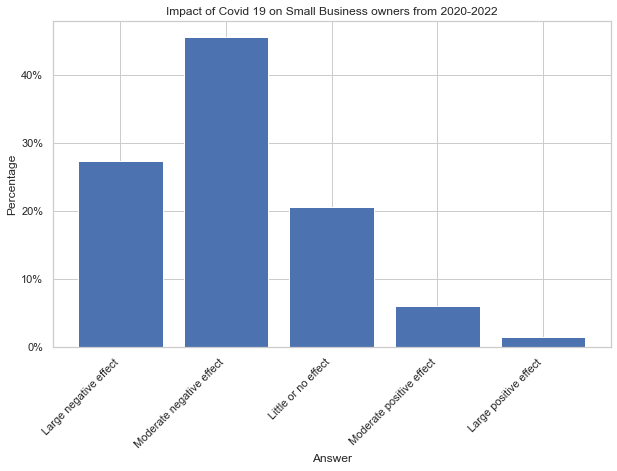

In [23]:
df_filtered = df_pandemic[df_pandemic['instrument_id'] == 2].copy()


df_filtered['percentage'] = df_filtered['percentage'].str.rstrip('%').astype('float') / 100.0
# Extract required columns
averages = df_filtered.groupby('answer_id')['percentage'].mean()

fig, ax = plt.subplots()
ax.set_title("Impact of Covid 19 on Small Business owners from 2020-2022")
ax.bar(averages.index, averages.values)
ax.set_xticks(averages.index)
ax.set_xticklabels(['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect','Large positive effect'],rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_xlabel('Answer')

def percent(x, pos):
    return '{:.0%}'.format(x)

yticks = mtick.FuncFormatter(percent)
ax.yaxis.set_major_formatter(yticks)

print(averages)
plt.show()

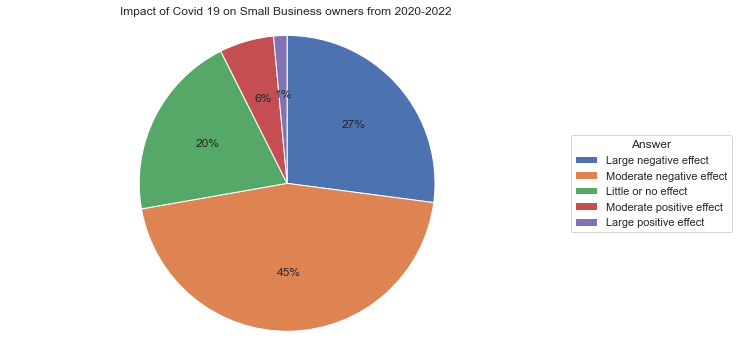

In [24]:
fig, ax = plt.subplots()
ax.set_title("Impact of Covid 19 on Small Business owners from 2020-2022")

# Plot the pie chart
wedges, texts, autotexts = ax.pie(averages.values, autopct='%.0f%%', startangle=90, counterclock=False)

# Create legend labels
legend_labels = ['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect', 'Large positive effect']

# Set legend
ax.legend(wedges, legend_labels, title="Answer", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

### Machine Learning Model 1 - Predicting Survey Estimate Percentages with a Gradient Boosting Regressor

This model aims to predict the 'ESTIMATE_PERCENTAGE' feature from a survey dataset using a Gradient Boosting Regressor. The dataset is preprocessed and categorical features are label-encoded, followed by splitting the data into training and test sets. The model is trained on the training data and evaluated on the test data using the Mean Squared Error (MSE) metric to assess its performance in predicting the 'ESTIMATE_PERCENTAGE' values.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('National_Sate_Illinois_data.csv')
# Preprocessing
df1['ESTIMATE_PERCENTAGE'] = df1['ESTIMATE_PERCENTAGE'].str.rstrip('%').astype('float') / 100.0
df1['SE'] = df1['SE'].str.rstrip('%').astype('float') / 100.0

# Encoding categorical variables
le = LabelEncoder()
df1['ST'] = le.fit_transform(df1['ST'])
df1['QUESTION'] = le.fit_transform(df1['QUESTION'])
df1['ANSWER_TEXT'] = le.fit_transform(df1['ANSWER_TEXT'])

# Define features and target
X = df1.drop('ESTIMATE_PERCENTAGE', axis=1)
y = df1['ESTIMATE_PERCENTAGE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.022558408073617114


The lower the MSE, the better the model's performance in general.

In [25]:
df_min=df['CurrentApprovalAmount'].min()
df_max=df['CurrentApprovalAmount'].max()
print(df_min)
print(df_max)

150000.0
10000000.0


In [26]:
unique_business_types = df['BusinessType'].unique()
print("Unique Business Types: ", unique_business_types)

Unique Business Types:  ['Limited  Liability Company(LLC)' 'Corporation'
 'Subchapter S Corporation' 'Non-Profit Organization'
 '501(c)3 – Non Profit' 'Employee Stock Ownership Plan(ESOP)'
 'Sole Proprietorship' 'Partnership' nan 'Professional Association'
 'Limited Liability Partnership' 'Trust' 'Cooperative'
 '501(c)6 – Non Profit Membership' 'Non-Profit Childcare Center'
 'Joint Venture' 'Independent Contractors' 'Tenant in Common'
 'Self-Employed Individuals' 'Single Member LLC']


### Machine Learning Model 2 - Small Business Impact Level Prediction Model using RandomForest Classifier

This machine learning model predicts the impact level of small businesses based on their current approval amount using a RandomForest Classifier algorithm. The RandomForest Classifier is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) for the individual trees. It is chosen for this task because of its ability to handle high-dimensional data, reduce overfitting, and provide robust predictions, even in the presence of noisy or missing data.

The impact levels are categorized into 'Less Impacted', 'Moderately Impacted', and 'Highly Impacted'. Features considered in the model include 'BusinessType', 'ProjectCity', 'JobsReported', and 'BusinessAgeDescription'. The data is first one-hot encoded to ensure that categorical variables are suitably represented for the algorithm. Then, the model is trained using a stratified k-fold cross-validation approach and hyperparameter tuning is performed using grid search to optimize its performance.

In [35]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Preparation
df['ImpactLevel'] = pd.qcut(df['CurrentApprovalAmount'], q=[0, 0.25, 0.75, 1], labels=['Less Impacted', 'Moderately Impacted', 'Highly Impacted'])
features = ['BusinessType', 'ProjectCity', 'JobsReported', 'BusinessAgeDescription']
target = 'ImpactLevel'
X = df[features]
y = df[target]

# Step 2: Data Encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Step 3: Model Training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


new_data = pd.DataFrame({'BusinessType': ['Sole Proprietorship'], 'ProjectCity': ['CHICAGO'], 'JobsReported': [3], 'BusinessAgeDescription': ['Existing or more than 2 years old']})
new_data_encoded = encoder.transform(new_data)
new_prediction = model.predict(new_data_encoded)[0]
print(f"Predicted Impact Level: {new_prediction}")


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.668, Precision: 0.667, Recall: 0.668, F1 Score: 0.660
Predicted Impact Level: Moderately Impacted


## Results

#### What were the primary consequences of Covid-19 on small businesses?
The primary consequences of Covid-19 on small businesses were predominantly negative, as 72% of them faced adverse effects. This highlights the need for support and resources to help these businesses recover and grow. Some of the factors that contributed to these negative consequences include reduced customer demand, disrupted supply chains, and the need to adapt to new regulations and guidelines.

#### How did the distribution of loans approved for projects in Illinois counties vary?
The distribution of loans approved for projects in Illinois counties varied significantly, with Cook County and its neighboring counties (DuPage, Will, Kane, Lake) receiving the highest loan amounts. This is indicated by the darker shades of red on the map. Other counties in Illinois had comparatively lower loan approvals, with lighter shades of red or no color. Factors such as population density, economic activity, infrastructure, and overall demand for projects may have contributed to these disparities.

#### What insights can be drawn from the small percentage of businesses that experienced growth or benefits during the pandemic?
The small percentage (7%) of businesses that experienced growth or benefits during the pandemic indicates that certain sectors or business models were able to capitalize on the situation. These businesses may have been more adaptable, able to pivot their operations, or catered to the changing needs and demands of consumers. This underscores the importance of adaptability, innovation, and resilience in navigating challenging economic conditions.
